In [124]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

149.5


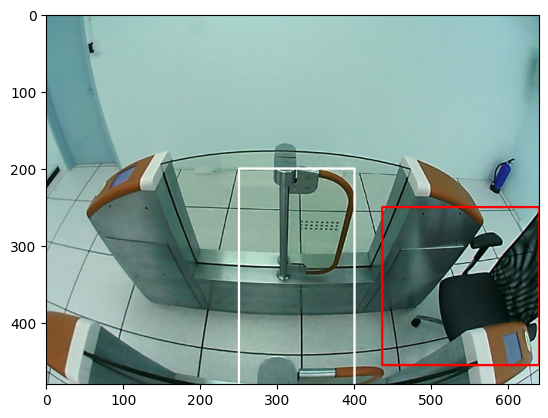

In [318]:
ref_img = cv2.imread('./empty_gate_bg.jpg', 1) 
# ref_img = cv2.cvtColor(ref_img, cv2.IMREAD_GRAYSCALE)

img = cv2.imread('./chair_bg.jpg', 1) 
# img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)

fgbg = cv2.createBackgroundSubtractorMOG2(history=100, varThreshold=1000, detectShadows=False)
# fgbg = cv2.createBackgroundSubtractorKNN()
fgMask = fgbg.apply(ref_img)

fgMask = fgbg.apply(img)
fgMask = cv2.cvtColor(fgMask, cv2.COLOR_BGR2RGB)

x1, x2 = 250, 400
y1, y2 = 200, 600
fgMask[y1:y2, x1:x2] = 0

structElement5x5 = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
# for i in range(20):
#     img_for_contour = cv2.erode(fgMask, structElement5x5)
for i in range(2):
    fgMask = cv2.dilate(fgMask, structElement5x5)

fgMask = cv2.GaussianBlur(fgMask, (5, 5), 0)
fgMask = cv2.Canny(fgMask, 10, 90)
contours, hierarchy = cv2.findContours(fgMask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

for i in range(0, len(contours)):
    (x, y, w, h) = cv2.boundingRect(contours[i])
    if w < 50:
        continue

    print(cv2.contourArea(contours[i]))
    if cv2.contourArea(contours[i]) > 100:
        color = (255, 0, 0)
    else:
        color = (255, 255, 0)
    cv2.rectangle(img, (int(x), int(y)), (int(x+w), int(y+h)), color, 2)

cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (255, 255, 255), 2)
plt.imshow(img)